In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

C:\Users\himanshik\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
train_df = pd.read_csv('C:/Users/himanshik/Downloads/Machine Learning and Data Science/Titanic Dataset/train.csv')
test_df = pd.read_csv('C:/Users/himanshik/Downloads/Machine Learning and Data Science/Titanic Dataset/test.csv')
combine = [train_df, test_df]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
train_df.info()
print('__'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 no

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Aubart, Mme. Leontine Pauline",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [7]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [10]:
train_df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


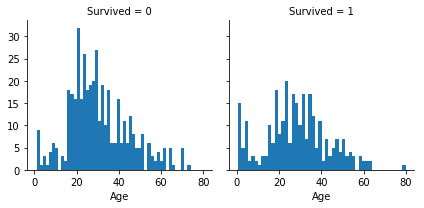

In [11]:
g=sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist,'Age',bins=50)

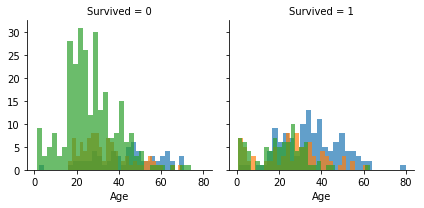

In [12]:
grid=sns.FacetGrid(train_df, col='Survived', hue='Pclass')
grid.map(plt.hist,'Age',alpha=0.7,bins=30)
#grid.add_legend()

C:\Users\himanshik\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\himanshik\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\himanshik\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


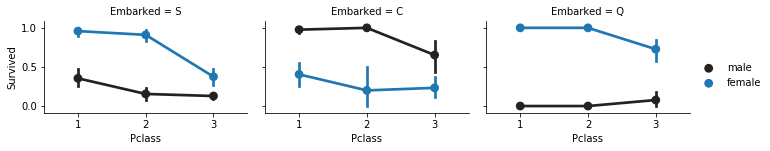

In [13]:
gr=sns.FacetGrid(train_df,col='Embarked',height=2.2,aspect=1.5)
gr.map(sns.pointplot,'Pclass','Survived','Sex')
gr.add_legend()
# grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
# grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
# grid.add_legend()

In [14]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
print(combine)

Before (891, 12) (418, 11) (891, 12) (418, 11)
[     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24

In [15]:
#train_df= train_df.drop(['Ticket','Cabin'],axis=1)
#test_df= test_df.drop(['Ticket','Cabin'],axis=1)
combine = [train_df,test_df]
print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

After (891, 12) (418, 11) (891, 12) (418, 11)


In [16]:
for dataset in combine:
    dataset['Title'] =dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [17]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')

train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [18]:
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,1


In [19]:
train_df = train_df.drop(['Name','PassengerId'],axis=1)
test_df = test_df.drop(['Name'],axis=1)
combine =[train_df,test_df]
train_df.shape,test_df.shape

((891, 11), (418, 11))

In [20]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1,'male':0}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,1,1,1,35.0,1,0,113803,53.1000,C123,S,3
4,0,3,0,35.0,0,0,373450,8.0500,NaN,S,1


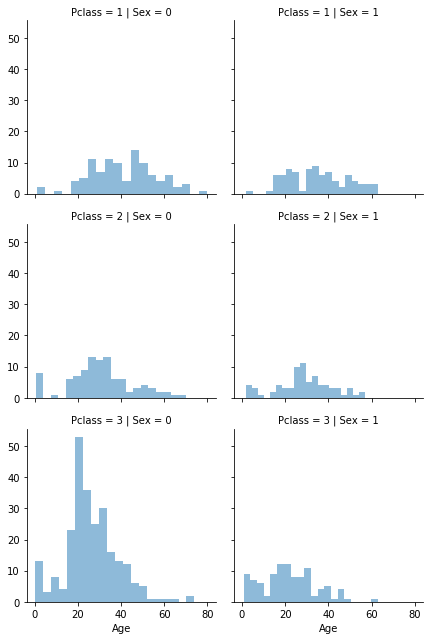

In [21]:
grid = sns.FacetGrid(train_df, row = 'Pclass', col='Sex')
grid.map(plt.hist,'Age',alpha=0.5,bins=20)
grid.add_legend()

In [22]:
guess_ages= np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [23]:
for dataset in combine:
    for i in range (0,2):
        for j in range(0,3):
            guess_df =dataset[(dataset['Sex'] == i) & \
                             (dataset['Pclass']==j+1)]['Age'].dropna()
            age_guess=guess_df.median()
            print(age_guess)
            guess_ages[i,j]=int(age_guess/0.5+0.5)*0.5
            print(guess_ages[i,j],i,j)
    for i in range (0,2):
        for j in range (0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass ==j+1),'Age'] = guess_ages[i,j]
    dataset['Age'] =dataset['Age'].astype(int)
print(dataset.Age.isnull())

40.0
40.0 0 0
30.0
30.0 0 1
25.0
25.0 0 2
35.0
35.0 1 0
28.0
28.0 1 1
21.5
21.5 1 2
42.0
42.0 0 0
28.0
28.0 0 1
24.0
24.0 0 2
41.0
41.0 1 0
24.0
24.0 1 1
22.0
22.0 1 2
0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
388    False
389    False
390    False
391    False
392    False
393    False
394    False
395    False
396    False
397    False
398    False
399    False
400    False
401    False
402    False
403    False
404    False
405    False
406    False
407    False
408    False
409    False
410    False
411    False
412    False
413    False
414    False
415    False
416    False
417    False
Name: Age, Length: 418, dtype: bool


In [24]:
train_df['AgeBand']=pd.cut(train_df['Age'],5)
train_df
train_df[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand',ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [25]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

In [26]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
print(train_df)

     Survived  Pclass  Sex  Age  SibSp  Parch            Ticket      Fare  \
0           0       3    0    1      1      0         A/5 21171    7.2500   
1           1       1    1    2      1      0          PC 17599   71.2833   
2           1       3    1    1      0      0  STON/O2. 3101282    7.9250   
3           1       1    1    2      1      0            113803   53.1000   
4           0       3    0    2      0      0            373450    8.0500   
5           0       3    0    1      0      0            330877    8.4583   
6           0       1    0    3      0      0             17463   51.8625   
7           0       3    0    0      3      1            349909   21.0750   
8           1       3    1    1      0      2            347742   11.1333   
9           1       2    1    0      1      0            237736   30.0708   
10          1       3    1    0      1      1           PP 9549   16.7000   
11          1       1    1    3      0      0            113783   26.5500   

In [27]:
for dataset in combine:
    dataset['Familysize'] = dataset['Parch']+dataset['SibSp']+1
    
train_df[['Familysize','Survived']].groupby(['Familysize'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Familysize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [28]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['Familysize']==1,'IsAlone']=1
train_df[['IsAlone','Survived']].groupby(['IsAlone'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [29]:
train_df = train_df.drop(['Parch', 'SibSp', 'Familysize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'Familysize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,IsAlone
0,0,3,0,1,A/5 21171,7.2500,NaN,S,1,0
1,1,1,1,2,PC 17599,71.2833,C85,C,3,0
2,1,3,1,1,STON/O2. 3101282,7.9250,NaN,S,2,1
3,1,1,1,2,113803,53.1000,C123,S,3,0
4,0,3,0,2,373450,8.0500,NaN,S,1,1


In [30]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [31]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [32]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [33]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,A/5 21171,7.2500,NaN,0,1,0,3
1,1,1,1,2,PC 17599,71.2833,C85,1,3,0,2
2,1,3,1,1,STON/O2. 3101282,7.9250,NaN,0,2,1,3
3,1,1,1,2,113803,53.1000,C123,0,3,0,2
4,0,3,0,2,373450,8.0500,NaN,0,1,1,6


In [34]:
test_df['Fare'].fillna(test_df['Fare'].dropna().mode(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,330911,7.8292,NaN,2,1,1,6
1,893,3,1,2,363272,7.0000,NaN,0,3,0,6
2,894,2,0,3,240276,9.6875,NaN,2,1,1,6
3,895,3,0,1,315154,8.6625,NaN,0,1,1,3
4,896,3,1,1,3101298,12.2875,NaN,0,3,0,3


In [35]:
train_df['FareBand'] = pd.qcut(train_df['Fare'],4)
train_df[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='FareBand',ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [36]:
for dataset in combine:
    dataset.loc[dataset['Fare']<=7.91,'Fare']=0
    dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.454),'Fare']=1
    dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare']<=31.0),'Fare']=2
    dataset.loc[dataset['Fare']>31.0,'Fare']=3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [38]:
train_df.head(10)

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,IsAlone,Age*Class,FareBand
0,0,3,0,1,A/5 21171,0,NaN,0,1,0,3,"(-0.001, 7.91]"
1,1,1,1,2,PC 17599,3,C85,1,3,0,2,"(31.0, 512.329]"
2,1,3,1,1,STON/O2. 3101282,1,NaN,0,2,1,3,"(7.91, 14.454]"
3,1,1,1,2,113803,3,C123,0,3,0,2,"(31.0, 512.329]"
4,0,3,0,2,373450,1,NaN,0,1,1,6,"(7.91, 14.454]"
5,0,3,0,1,330877,1,NaN,2,1,1,3,"(7.91, 14.454]"
6,0,1,0,3,17463,3,E46,0,1,1,3,"(31.0, 512.329]"
7,0,3,0,0,349909,2,NaN,0,4,0,0,"(14.454, 31.0]"
8,1,3,1,1,347742,1,NaN,0,3,0,3,"(7.91, 14.454]"
9,1,2,1,0,237736,2,NaN,1,3,0,0,"(14.454, 31.0]"


In [40]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,330911,0.0,NaN,2,1,1,6
1,893,3,1,2,363272,0.0,NaN,0,3,0,6
2,894,2,0,3,240276,1.0,NaN,2,1,1,6
3,895,3,0,1,315154,1.0,NaN,0,1,1,3
4,896,3,1,1,3101298,1.0,NaN,0,3,0,3
5,897,3,0,0,7538,1.0,NaN,0,1,1,0
6,898,3,1,1,330972,0.0,NaN,2,2,1,3
7,899,2,0,1,248738,2.0,NaN,0,1,0,2
8,900,3,1,1,2657,0.0,NaN,1,3,1,3
9,901,3,0,1,A/4 48871,2.0,NaN,0,1,0,3


In [42]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 11), (891,), (418, 10))

In [43]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'